# Example behavior and ophys data
The following example shows how to access behavioral data for a given recording session and how to align with corresponding neural data

We will first install allensdk into your environment by running the appropriate commands below.

## Install AllenSDK into your local environment

 You can install AllenSDK locally with:

In [1]:
!pip install allensdk

## Install AllenSDK into your notebook environment (good for Google Colab)

You can install AllenSDK into your notebook environment by executing the cell below.

If using Google Colab, click on the RESTART RUNTIME button that appears at the end of the output when this cell is complete,. Note that running this cell will produce a long list of outputs and some error messages. Clicking RESTART RUNTIME at the end will resolve these issues.
You can minimize the cell after you are done to hide the output.

In [2]:
!pip install --upgrade pip
!pip install allensdk

## Imports

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)

import allensdk.brain_observatory.behavior.behavior_project_cache as bpc

import allensdk
import pkg_resources
print('allensdk version 2.10.2 or higher is required, you have {} installed'.format(pkg_resources.get_distribution("allensdk").version))

allensdk version 2.10.2 or higher is required, you have 2.14.0 installed


In [4]:
%matplotlib notebook

## Make notebook use full screen width

In [5]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

/tmp/ipykernel_9919/3777615979.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [6]:
output_dir = '/path/to/vbo'

In [7]:
bc = bpc.VisualBehaviorOphysProjectCache.from_s3_cache(cache_dir=output_dir)
          
experiment_table = bc.get_ophys_experiment_table()                          

## Look at a sample of the experiment table

In [8]:
experiment_table.sample(5)

equipment_name  \
ophys_experiment_id                  
1008408514                  MESO.1   
1005299957                 CAM2P.4   
1067648397                 CAM2P.3   
993593393                  CAM2P.3   
981178537                   MESO.1   

                                                     full_genotype mouse_id  \
ophys_experiment_id                                                           
1008408514           Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt   499478   
1005299957           Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt   492395   
1067648397           Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt   538219   
993593393            Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt   485688   
981178537            Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt   482853   

                                  reporter_line     driver_line sex  \
ophys_experiment_id                                                   
1008408514           Ai148(TIT2L-GC6f-ICL-tTA2)  [Vip-IRES-Cre]   F   
1005299957           Ai148(TIT2L-GC6f-ICL-tTA2)  [Vip-IRES-Cre]   F   
1067648397           Ai148(TIT2L-GC6f-ICL-tTA2)  [Vip-IRES-Cre]   F   
993593393            Ai148(TIT2L-GC6f-ICL-tTA2)  [Sst-IRES-Cre]   M   
981178537            Ai148(TIT2L-GC6f-ICL-tTA2)  [Sst-IRES-Cre]   M   

                     age_in_days      cre_line indicator  session_number  \
ophys_experiment_id                                                        
1008408514                 134.0  Vip-IRES-Cre   GCaMP6f             1.0   
1005299957                 167.0  Vip-IRES-Cre   GCaMP6f             4.0   
1067648397                 174.0  Vip-IRES-Cre   GCaMP6f             4.0   
993593393                  149.0  Sst-IRES-Cre   GCaMP6f             5.0   
981178537                  135.0  Sst-IRES-Cre   GCaMP6f             6.0   

                     prior_exposures_to_session_type  \
ophys_experiment_id                                    
1008408514                                       0.0   
1005299957                                       1.0   
1067648397                                       0.0   
993593393                                        0.0   
981178537                                        0.0   

                     prior_exposures_to_image_set  \
ophys_experiment_id                                 
1008408514                                   10.0   
1005299957                                    1.0   
1067648397                                    0.0   
993593393                                     1.0   
981178537                                     2.0   

                     prior_exposures_to_omissions  ophys_session_id  \
ophys_experiment_id                                                   
1008408514                                    0.0        1008003852   
1005299957                                    7.0        1005249212   
1067648397                                    4.0        1067593227   
993593393                                     5.0         993450968   
981178537                                     6.0         980062339   

                     behavior_session_id  ophys_container_id  \
ophys_experiment_id                                            
1008408514                    1008034648          1018027819   
1005299957                    1005261321          1000740620   
1067648397                    1067611874          1064333290   
993593393                      993496240           989461845   
981178537                      980261694          1018028218   

                                          project_code  imaging_depth  \
ophys_experiment_id                                                     
1008408514           VisualBehaviorMultiscope4areasx2d            267   
1005299957                        VisualBehaviorTask1B            175   
1067648397                              VisualBehavior            175   
993593393                         VisualBehaviorTask1B            275   
981178537         

### here are all of the unique session types

In [9]:
np.sort(experiment_table['session_type'].unique())

array(['OPHYS_1_images_A', 'OPHYS_1_images_B', 'OPHYS_1_images_G',
       'OPHYS_2_images_A_passive', 'OPHYS_2_images_B_passive',
       'OPHYS_2_images_G_passive', 'OPHYS_3_images_A', 'OPHYS_3_images_B',
       'OPHYS_3_images_G', 'OPHYS_4_images_A', 'OPHYS_4_images_B',
       'OPHYS_4_images_H', 'OPHYS_5_images_A_passive',
       'OPHYS_5_images_B_passive', 'OPHYS_5_images_H_passive',
       'OPHYS_6_images_A', 'OPHYS_6_images_B', 'OPHYS_6_images_H'],
      dtype=object)

### Select an `OPHYS_1_images_A` experiment at random, load the experiment data

In [10]:
experiment_id = experiment_table.query('session_type == "OPHYS_1_images_A"').sample(random_state=10).index[0]
print('getting experiment data for experiment_id {}'.format(experiment_id))
experiment_dataset = bc.get_behavior_ophys_experiment(experiment_id)

getting experiment data for experiment_id 946476556


/allen/aibs/informatics/chris.morrison/miniconda3/envs/allensdk_jupyter/lib/python3.8/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.3.0 because version 1.5.1 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/allen/aibs/informatics/chris.morrison/miniconda3/envs/allensdk_jupyter/lib/python3.8/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.2.5 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## Look at the performance data
We can see that the d-prime metric, a measure of discrimination performance, peaked at 2.14 during this session, indicating mid-range performance.  
(d' = 0 means no discrimination performance, d' is infinite for perfect performance, but is limited to about 4.5 this dataset due to trial count limitations). 

In [11]:
experiment_dataset.get_performance_metrics()

{'trial_count': 489,
 'go_trial_count': 325,
 'catch_trial_count': 48,
 'hit_trial_count': 11,
 'miss_trial_count': 314,
 'false_alarm_trial_count': 4,
 'correct_reject_trial_count': 44,
 'auto_reward_count': 5,
 'earned_reward_count': 11,
 'total_reward_count': 16,
 'total_reward_volume': 0.10200000000000001,
 'maximum_reward_rate': 3.606067930506664,
 'engaged_trial_count': 82,
 'mean_hit_rate': 0.09107934458687789,
 'mean_hit_rate_uncorrected': 0.09030062323224546,
 'mean_hit_rate_engaged': 0.7413614163614164,
 'mean_false_alarm_rate': 0.1831974556974557,
 'mean_false_alarm_rate_uncorrected': 0.16967797967797968,
 'mean_false_alarm_rate_engaged': 0.6666666666666667,
 'mean_dprime': -0.6280628929364763,
 'mean_dprime_engaged': 0.3837839767679964,
 'max_dprime': 0.967421566101701,
 'max_dprime_engaged': 0.967421566101701}

### We can build a trial dataframe that tells us about behavior events on every trial. This can be merged with a rolling performance dataframe, which calculates behavioral performance metrics over a rolling window of 100 trials (excluding aborted trials, or trials where the animal licks prematurely). 

In [12]:
trials_df = experiment_dataset.trials.merge(
    experiment_dataset.get_rolling_performance_df().fillna(method='ffill'), # performance data is NaN on aborted trials. Fill forward to populate.
    left_index = True,
    right_index = True
)

In [13]:
trials_df.head()

start_time  stop_time  \
trials_id                          
0           305.97088  313.22681   
1           313.47703  314.66132   
2           314.97825  316.36271   
3           316.47944  317.46361   
4           317.98101  319.91561   

                                                  lick_times  reward_time  \
trials_id                                                                   
0          [309.5071, 309.77427, 309.94106, 310.1246, 310...    309.12347   
1          [313.59405, 313.77752, 313.96101, 314.14447, 3...          NaN   
2          [315.11169, 315.29514, 315.46196, 315.66213, 3...          NaN   
3                [316.69632, 316.9632, 317.14669, 317.56369]          NaN   
4          [318.28122, 318.49814, 318.69795, 318.86475, 3...          NaN   

           reward_volume    hit  false_alarm   miss  is_change  aborted  \
trials_id                                                                 
0                  0.005  False        False  False       True    False   
1                  0.000  False        False  False      False     True   
2                  0.000  False        False  False      False     True   
3                  0.000  False        False  False      False     True   
4                  0.000  False        False  False      False     True   

              go  catch  auto_rewarded  correct_reject  trial_length  \
trials_id                                                              
0          False  False           True           False       7.25593   
1          False  False          False           False       1.18429   
2          False  False          False           False       1.38446   
3          False  False          False           False       0.98417   
4          False  False          False           False       1.93460   

           response_time  change_frame  change_time  response_latency  \
trials_id                                                               
0               309.5071       18165.0   308.994843          0.512257   
1                    NaN           NaN          NaN               NaN   
2                    NaN           NaN          NaN               NaN   
3                    NaN           NaN          NaN               NaN   
4                    NaN           NaN          NaN               NaN   

          initial_image_name change_image_name  reward_rate  hit_rate_raw  \
trials_id                                                                   
0                      im065             im077          NaN           NaN   
1                      im077             im077          NaN           NaN   
2                      im077             im077          NaN           NaN   
3                      im077             im077          NaN           NaN   
4                      im077             im077          NaN           NaN   

           hit_rate  false_alarm_rate_raw  false_alarm_rate  rolling_dprime  
trials_id                                                                    
0               NaN                   NaN               NaN             NaN  
1               NaN                   NaN               NaN             NaN  
2               NaN                   NaN               NaN             NaN  
3               NaN                   NaN               NaN             NaN  
4               NaN                   NaN               NaN             NaN

### Now we can plot performance over the full experiment duration
Some key observations:
* The hit rate remains high for the first ~46 minutes of the session
* The false alarm rate graduall declines during the first ~25 minutes of the session.
* d' peaks when the hit rate is still high, but the false alarm rate dips
* The hit rate and d' fall off dramatically after ~46 minutes. This is likely due to the animal becoming sated and losing motivation to perform

<IPython.core.display.Javascript object>


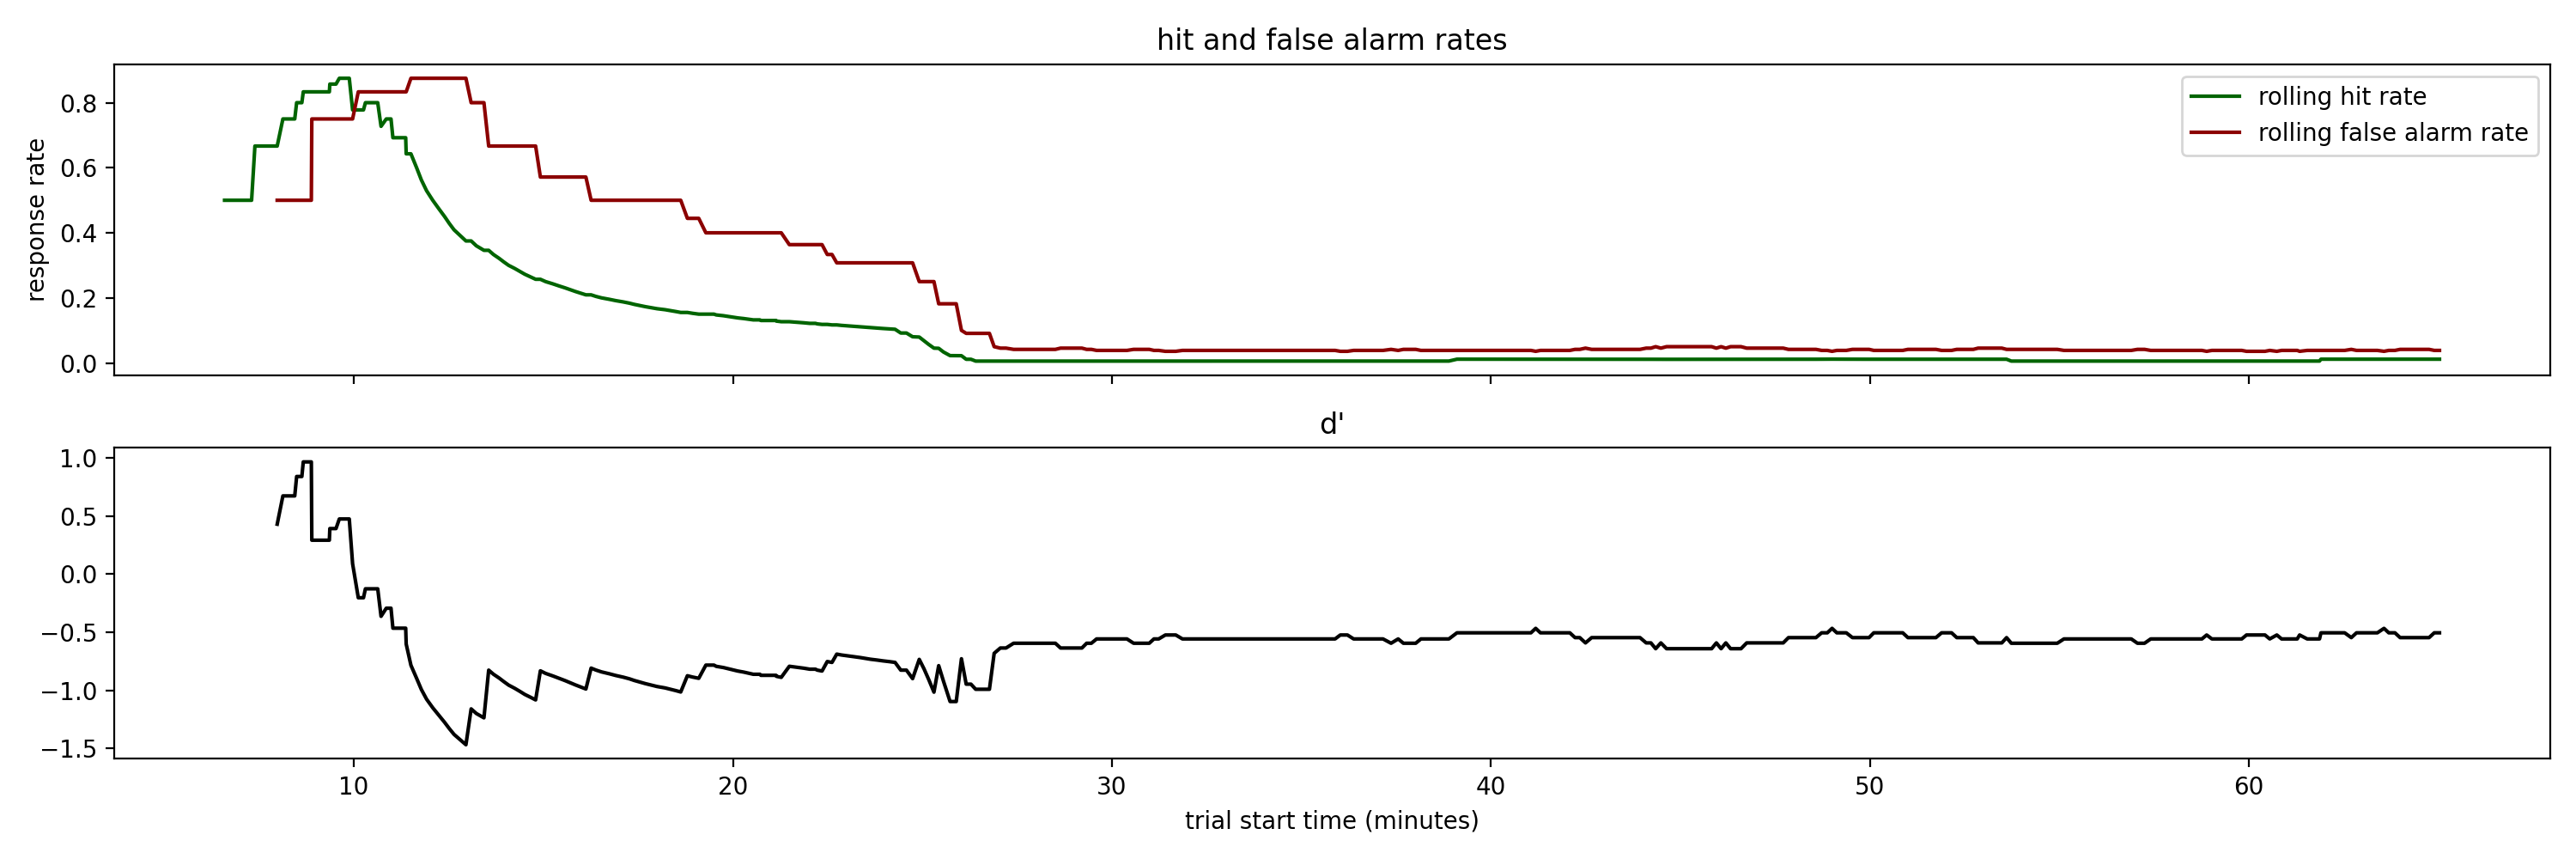

In [14]:
fig, ax = plt.subplots(2, 1, figsize = (15,5), sharex=True)
ax[0].plot(
    trials_df['start_time']/60.,
    trials_df['hit_rate'],
    color='darkgreen'
)

ax[0].plot(
    trials_df['start_time']/60.,
    trials_df['false_alarm_rate'],
    color='darkred'
)

ax[0].legend(['rolling hit rate', 'rolling false alarm rate'])

ax[1].plot(
    trials_df['start_time']/60.,
    trials_df['rolling_dprime'],
    color='black'
)

ax[1].set_xlabel('trial start time (minutes)')
ax[0].set_ylabel('response rate')
ax[0].set_title('hit and false alarm rates')
ax[1].set_title("d'")

fig.tight_layout()

## We can also look at a dataframe of stimulus presentations. This tells us the attributes of every stimulus that was shown in the session

In [15]:
stimulus_presentations = experiment_dataset.stimulus_presentations
stimulus_presentations.head()

duration  end_frame  flashes_since_change  \
stimulus_presentations_id                                              
0                           0.25022    18001.0                   0.0   
1                           0.25000        NaN                   0.0   
2                           0.25021    18091.0                   1.0   
3                           0.25019    18136.0                   2.0   
4                           0.25021    18181.0                   0.0   

                           image_index image_name  is_change  omitted  \
stimulus_presentations_id                                               
0                                    0      im065      False    False   
1                                    8    omitted      False     True   
2                                    0      im065      False    False   
3                                    0      im065      False    False   
4                                    1      im077       True    False   

                           start_frame  start_time   end_time  
stimulus_presentations_id                                      
0                                17986   305.98756  306.23778  
1                                18030   306.72150  306.97150  
2                                18076   307.48881  307.73902  
3                                18121   308.23943  308.48962  
4                                18166   308.99001  309.24022

#### Also note that there is an image name called 'omitted'. This represents the time that a stimulus would have been shown, had it not been omitted from the regular stimulus cadence. They are included here for ease of analysis, but it's important to note that they are not actually stimuli. They are the lack of expected stimuli.

In [16]:
stimulus_presentations.query('image_name == "omitted"').head()

duration  end_frame  flashes_since_change  \
stimulus_presentations_id                                              
1                              0.25        NaN                   0.0   
12                             0.25        NaN                   7.0   
33                             0.25        NaN                   1.0   
42                             0.25        NaN                   9.0   
66                             0.25        NaN                   6.0   

                           image_index image_name  is_change  omitted  \
stimulus_presentations_id                                               
1                                    8    omitted      False     True   
12                                   8    omitted      False     True   
33                                   8    omitted      False     True   
42                                   8    omitted      False     True   
66                                   8    omitted      False     True   

                           start_frame  start_time   end_time  
stimulus_presentations_id                                      
1                                18030   306.72150  306.97150  
12                               18525   314.97825  315.22825  
33                               19470   330.74111  330.99111  
42                               19875   337.49660  337.74660  
66                               20955   355.51131  355.76131

#### For plotting purposes below, let's add a column that specifies a unique color for every unique image

In [17]:
unique_stimuli = [stimulus for stimulus in stimulus_presentations['image_name'].unique() if stimulus != 'omitted']
colormap = {image_name: sns.color_palette()[image_number] for image_number, image_name in enumerate(np.sort(unique_stimuli))}
colormap['omitted'] = np.nan # assign gray to omitted
colormap

{'im061': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 'im062': (1.0, 0.4980392156862745, 0.054901960784313725),
 'im063': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 'im065': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 'im066': (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 'im069': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 'im077': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 'im085': (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 'omitted': nan}

In [18]:
stimulus_presentations['color'] = stimulus_presentations['image_name'].map(lambda image_name: colormap[image_name])

### There are also dataframes containing running speed, licks, eye tracking, and neural data:

#### running speed
One entry for each read of the analog input line monitoring the encoder voltage, polled at ~60 Hz.

In [19]:
experiment_dataset.running_speed.head()

timestamps     speed
0     5.97684  0.022645
1     5.99360  2.234085
2     6.01018  4.367226
3     6.02686  6.337823
4     6.04354  8.063498

#### licks
One entry for every detected lick onset time, assigned the time of the corresponding visual stimulus frame.

In [20]:
experiment_dataset.licks.head()

timestamps  frame
0     8.44550    148
1    10.09646    247
2    50.69616   2681
3    50.94637   2696
4    72.69742   4000

#### eye tracking data
One entry containing ellipse fit parameters for the eye, pupil and corneal reflection for every frame of the eye tracking video stream.

In [21]:
experiment_dataset.eye_tracking.head()

timestamps     cr_area      eye_area    pupil_area  likely_blink  \
frame                                                                     
0         0.42068  208.304081  66690.199475  14852.461632         False   
1         0.43153  211.683443  67246.531870  14894.844884         False   
2         0.44081  213.529562  67260.825064  14763.415717         False   
3         0.47454  197.017497  67003.186733  14861.325140         False   
4         0.49075  184.506202  66531.120928  14813.194293         False   

       pupil_area_raw  cr_area_raw  eye_area_raw  cr_center_x  cr_center_y  \
frame                                                                        
0        14852.461632   208.304081  66690.199475   313.893949   275.783870   
1        14894.844884   211.683443  67246.531870   314.648703   274.890199   
2        14763.415717   213.529562  67260.825064   314.224868   274.586975   
3        14861.325140   197.017497  67003.186733   313.137500   276.562338   
4        14813.194293   184.506202  66531.120928   312.833888   276.887232   

       cr_width  cr_height    cr_phi  eye_center_x  eye_center_y   eye_width  \
frame                                                                          
0      7.792411   8.508952 -0.166632    331.879196    267.942025  162.943138   
1      8.011922   8.410084  0.211865    333.166388    267.938712  162.592435   
2      8.118027   8.372548  0.536483    332.547380    267.146070  162.991558   
3      8.169200   7.676715  0.559468    332.315725    268.699396  162.297228   
4      7.949605   7.387807 -0.157317    331.257388    269.569497  162.378660   

       eye_height   eye_phi  pupil_center_x  pupil_center_y  pupil_width  \
frame                                                                      
0      130.279495  0.055473      331.518456      267.277981    64.946794   
1      131.649642  0.049750      332.149275      267.294598    66.021009   
2      131.355181  0.038800      331.494585      266.882232    65.201056   
3      131.411836  0.043076      330.827633      269.505806    65.011954   
4      130.420546  0.042803      330.691566      269.404159    65.289862   

       pupil_height  pupil_phi  
frame                           
0         68.758166   0.487738  
1         68.856201   0.455899  
2         68.551741   0.448700  
3         68.778679   0.540266  
4         68.667213   0.227099

#### and deltaF/F values
One row per cell, with each containing an array of deltaF/F values.

In [22]:
experiment_dataset.dff_traces.head()

cell_roi_id  \
cell_specimen_id                
1086677732         1080782769   
1086677737         1080782784   
1086677746         1080782868   
1086677771         1080782948   
1086677774         1080782973   

                                                                dff  
cell_specimen_id                                                     
1086677732        [0.19445239017441418, 0.12601236314041633, 0.1...  
1086677737        [0.20871294449813774, 0.3277438520090626, 0.14...  
1086677746        [0.2461564600926237, 0.2061539632478795, 0.183...  
1086677771        [0.23367534487212552, 0.22006350260557936, 0.2...  
1086677774        [1.1538649539919354, 0.5792651430717506, 0.386...

#### we can convert the dff_traces to long-form (aka "tidy") as follows:

In [23]:
def get_cell_timeseries_dict(dataset, cell_specimen_id):
    '''
    for a given cell_specimen ID, this function creates a dictionary with the following keys
    * timestamps: ophys timestamps
    * cell_roi_id
    * cell_specimen_id
    * dff
    This is useful for generating a tidy dataframe
    arguments:
        session object
        cell_specimen_id
    returns
        dict
    '''
    cell_dict = {
        'timestamps': dataset.ophys_timestamps,
        'cell_roi_id': [dataset.dff_traces.loc[cell_specimen_id]['cell_roi_id']] * len(dataset.ophys_timestamps),
        'cell_specimen_id': [cell_specimen_id] * len(dataset.ophys_timestamps),
        'dff': dataset.dff_traces.loc[cell_specimen_id]['dff'],

    }
    return cell_dict

experiment_dataset.tidy_dff_traces = pd.concat(
    [pd.DataFrame(get_cell_timeseries_dict(experiment_dataset, cell_specimen_id)) for cell_specimen_id in experiment_dataset.dff_traces.reset_index()['cell_specimen_id']]
).reset_index(drop=True)

experiment_dataset.tidy_dff_traces.sample(5)

timestamps  cell_roi_id  cell_specimen_id       dff
51625762  2326.95251   1080796530        1086681119 -0.007740
46709528  1906.36515   1080796037        1086680809  0.043362
43841724  4302.11942   1080795492        1086680575 -0.238739
11732952  3406.73034   1080785002        1086678481 -0.005592
9633599   3472.24207   1080784442        1086678327 -0.043354

We can look at a few trials in some detail
First define a function to plot a number of data streams

    each stimulus as a colored vertical bar
    running speed
    licks/rewards
    pupil area
    neural responses (dF/F)

In [24]:
def plot_stimuli(trial, ax):
    '''
    plot stimuli as colored bars on specified axis
    '''
    stimuli = stimulus_presentations.query('end_time >= {} and start_time <= {} and not omitted'.format(float(trial['start_time']), float(trial['stop_time'])))
    for idx, stimulus in stimuli.iterrows():
        ax.axvspan(stimulus['start_time'], stimulus['end_time'], color=stimulus['color'], alpha=0.5)

        
def plot_running(trial, ax):
    '''
    plot running speed for trial on specified axes
    '''
    trial_running_speed = experiment_dataset.running_speed.query('timestamps >= {} and timestamps <= {} '.format(float(trial['start_time']), float(trial['stop_time'])))
    ax.plot(
        trial_running_speed['timestamps'],
        trial_running_speed['speed'],
        color='black'
    )
    ax.set_title('running speed')
    ax.set_ylabel('speed (cm/s)')
    

def plot_licks(trial, ax):
    '''
    plot licks as black dots on specified axis
    '''
    trial_licks = experiment_dataset.licks.query('timestamps >= {} and timestamps <= {} '.format(float(trial['start_time']), float(trial['stop_time'])))
    ax.plot(
        trial_licks['timestamps'],
        np.zeros_like(trial_licks['timestamps']),
        marker = 'o',
        linestyle = 'none',
        color='black'
    )
    

def plot_rewards(trial, ax):
    '''
    plot rewards as blue diamonds on specified axis
    '''
    trial_rewards = experiment_dataset.rewards.query('timestamps >= {} and timestamps <= {} '.format(float(trial['start_time']), float(trial['stop_time'])))
    ax.plot(
        trial_rewards['timestamps'],
        np.zeros_like(trial_rewards['timestamps']),
        marker = 'd',
        linestyle = 'none',
        color='blue',
        markersize = 10,
        alpha = 0.25
    )
    
def plot_pupil(trial, ax):
    '''
    plot pupil area on specified axis
    '''
    trial_eye_tracking = experiment_dataset.eye_tracking.query('timestamps >= {} and timestamps <= {} '.format(float(trial['start_time']), float(trial['stop_time'])))
    ax.plot(
        trial_eye_tracking['timestamps'],
        trial_eye_tracking['pupil_area'],
        color='black'
    )
    ax.set_title('pupil area')
    ax.set_ylabel('pupil area\n')
    

def plot_dff(trial, ax):
    '''
    plot each cell's dff response for a given trial
    '''
    trial_dff_traces = experiment_dataset.tidy_dff_traces.query('timestamps >= {} and timestamps <= {} '.format(float(trial['start_time']), float(trial['stop_time'])))
    for cell_specimen_id in experiment_dataset.tidy_dff_traces['cell_specimen_id'].unique():
        ax.plot(
            trial_dff_traces.query('cell_specimen_id == @cell_specimen_id')['timestamps'],
            trial_dff_traces.query('cell_specimen_id == @cell_specimen_id')['dff']
        )
        ax.set_title('deltaF/F responses')
        ax.set_ylabel('dF/F')
    
def make_trial_plot(trial):
    '''
    combine all plots for a given trial
    '''
    fig, axes = plt.subplots(4, 1, figsize = (15, 8), sharex=True)

    for ax in axes:
        plot_stimuli(trial, ax)
            
    plot_running(trial, axes[0])

    plot_licks(trial, axes[1])
    plot_rewards(trial, axes[1])
    
    axes[1].set_title('licks and rewards')
    axes[1].set_yticks([])
    axes[1].legend(['licks','rewards'])

    plot_pupil(trial, axes[2])

    plot_dff(trial, axes[3])
    
    axes[3].set_xlabel('time in session (seconds)')
    fig.tight_layout()
    return fig, axes

### here is a hit trial
Notes:
* The image identity changed just after t = 2361 seconds (note the color change in the vertical spans)
* The animal was running steadily prior to the image change, then slowed to a stop after the change
* The first lick occured about 500 ms after the change, and triggered an immediate reward
* The pupil area shows some missing data - these were points that were filtered out as outliers.
* There appears to be one neuron that was responding regularly to the stimulus prior to the change. 

In [25]:
stimulus_presentations.columns

Index(['duration', 'end_frame', 'flashes_since_change', 'image_index',
       'image_name', 'is_change', 'omitted', 'start_frame', 'start_time',
       'end_time', 'color'],
      dtype='object')

<IPython.core.display.Javascript object>


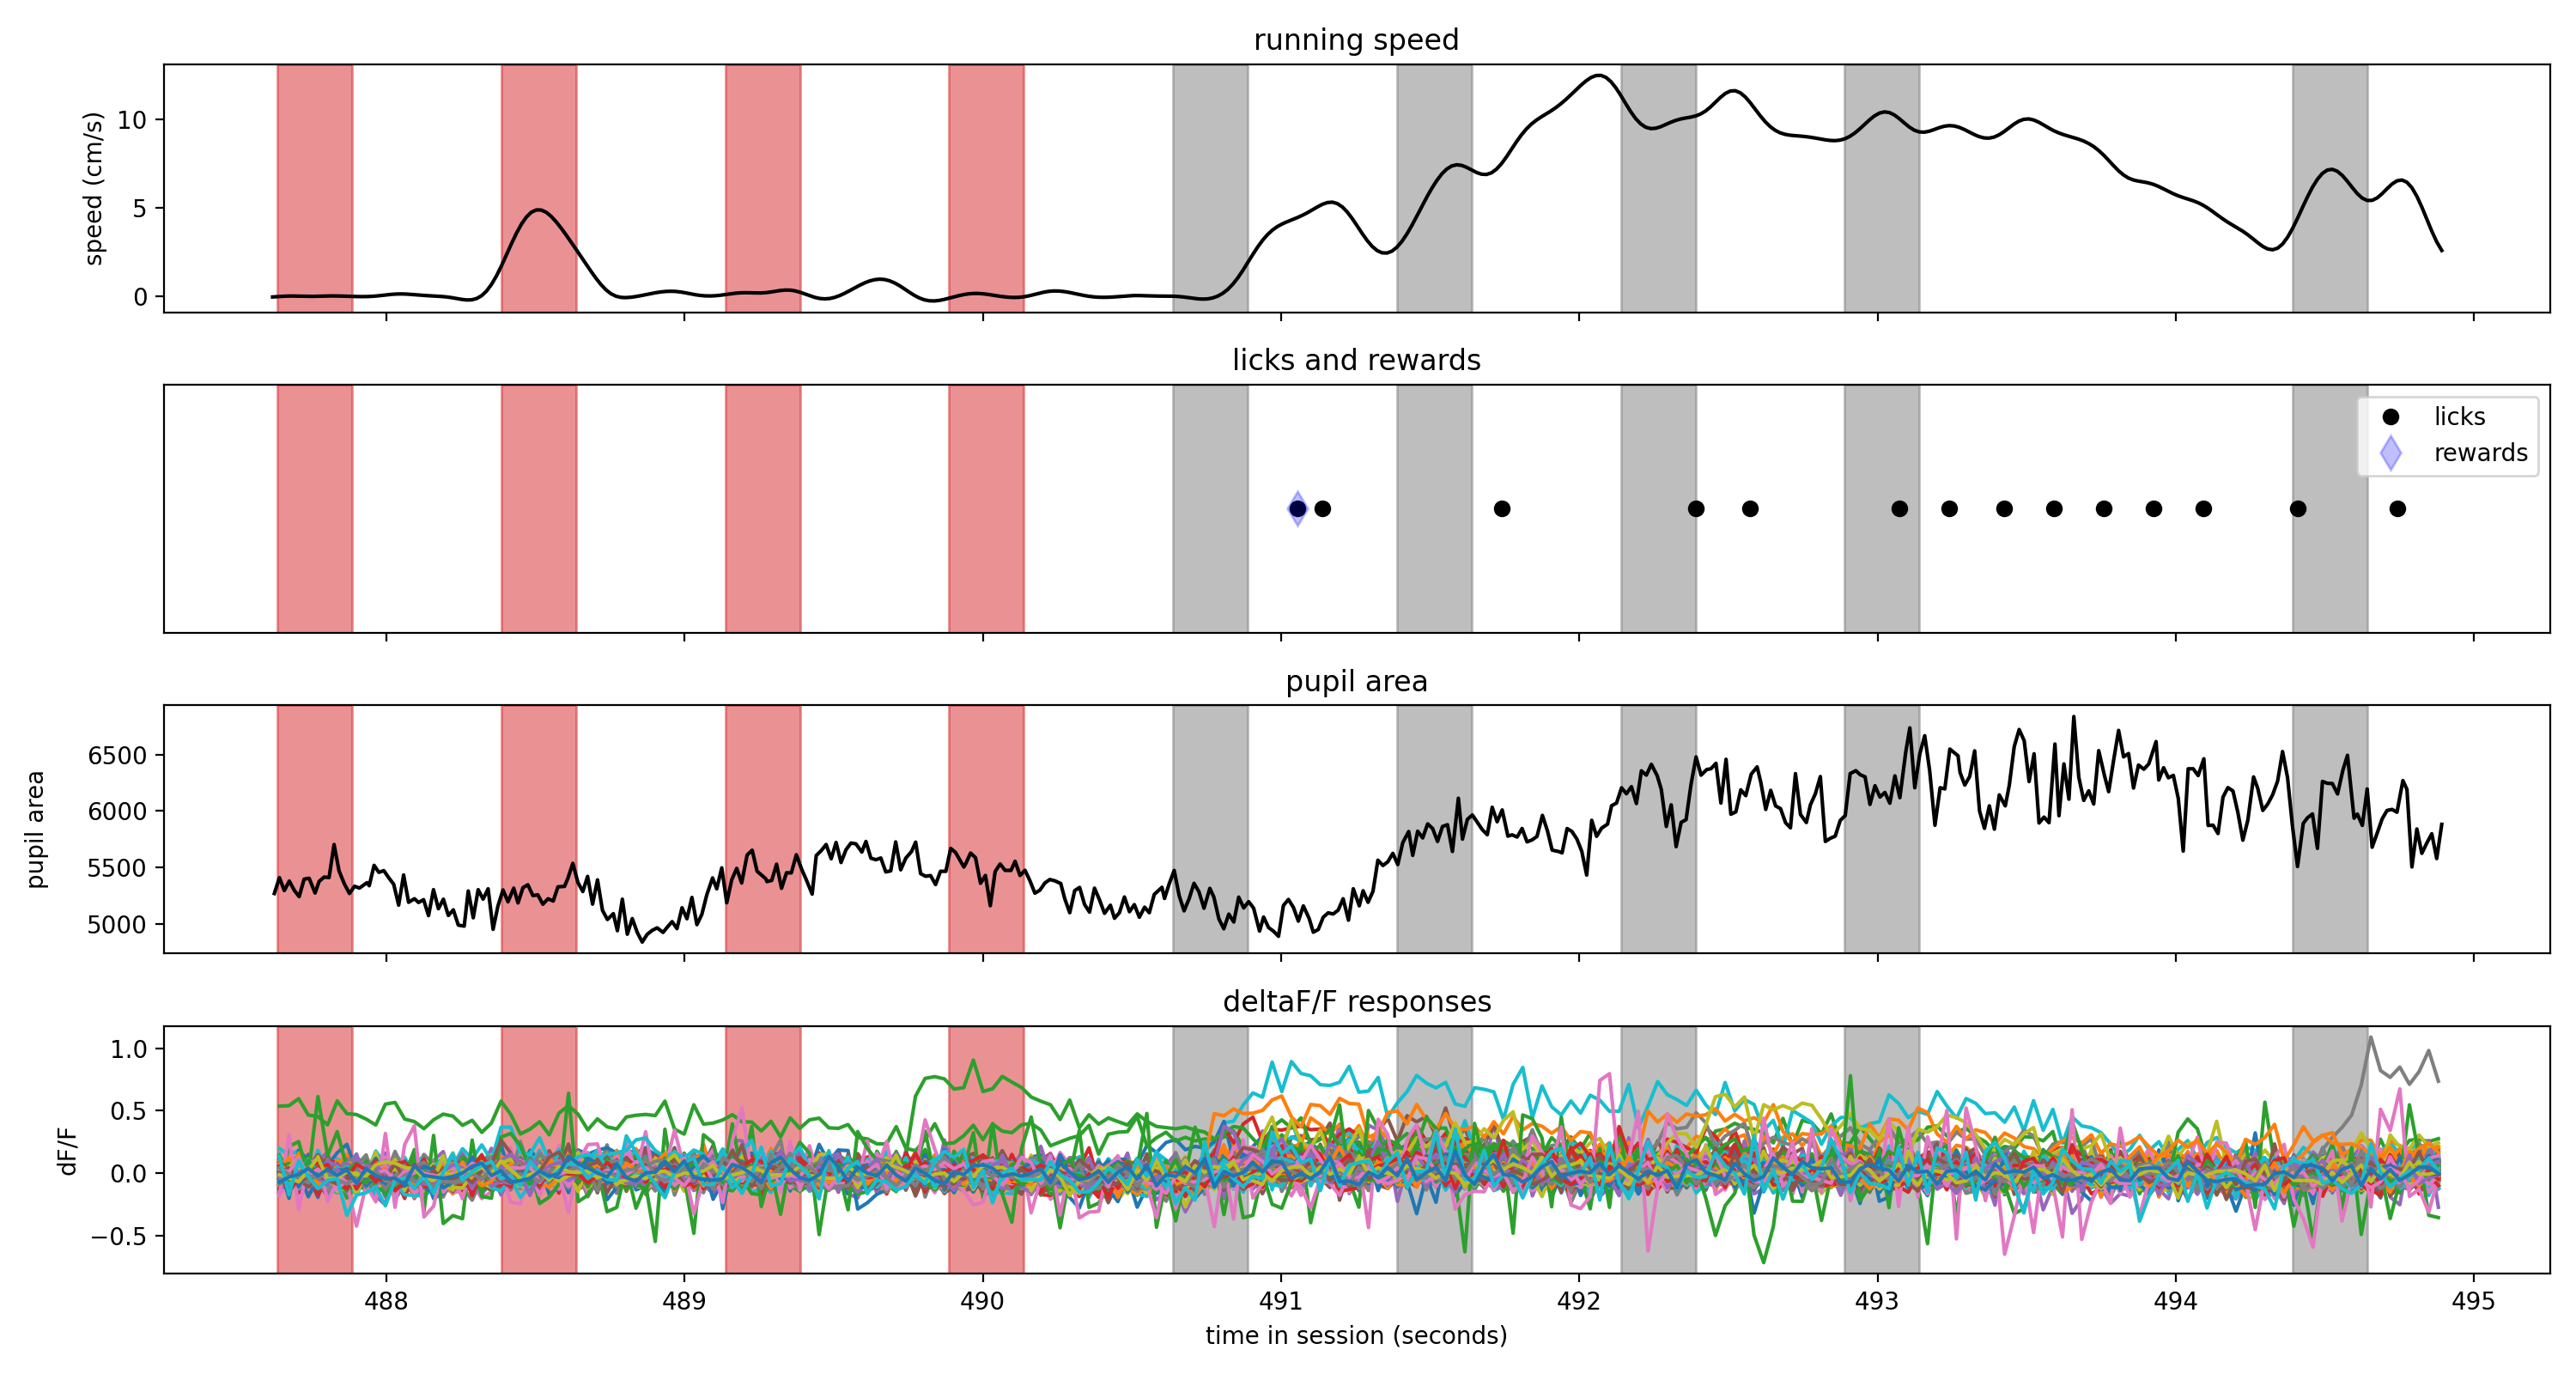

In [26]:
trial = experiment_dataset.trials.query('hit').sample(random_state = 1)
fig, axes = make_trial_plot(trial)

### here is a miss trial
Notes:
* The image identity changed just after t = 824 seconds (note the color change in the vertical spans)
* The animal was running relatively steadily during the entire trial and did not slow after the stimulus identity change
* There were no licks or rewards on this trial
* The pupil area shows some missing data - these were points that were filtered out as outliers.
* One neuron had a large response just prior to the change, but none appear to be stimulus locked on this trial

<IPython.core.display.Javascript object>


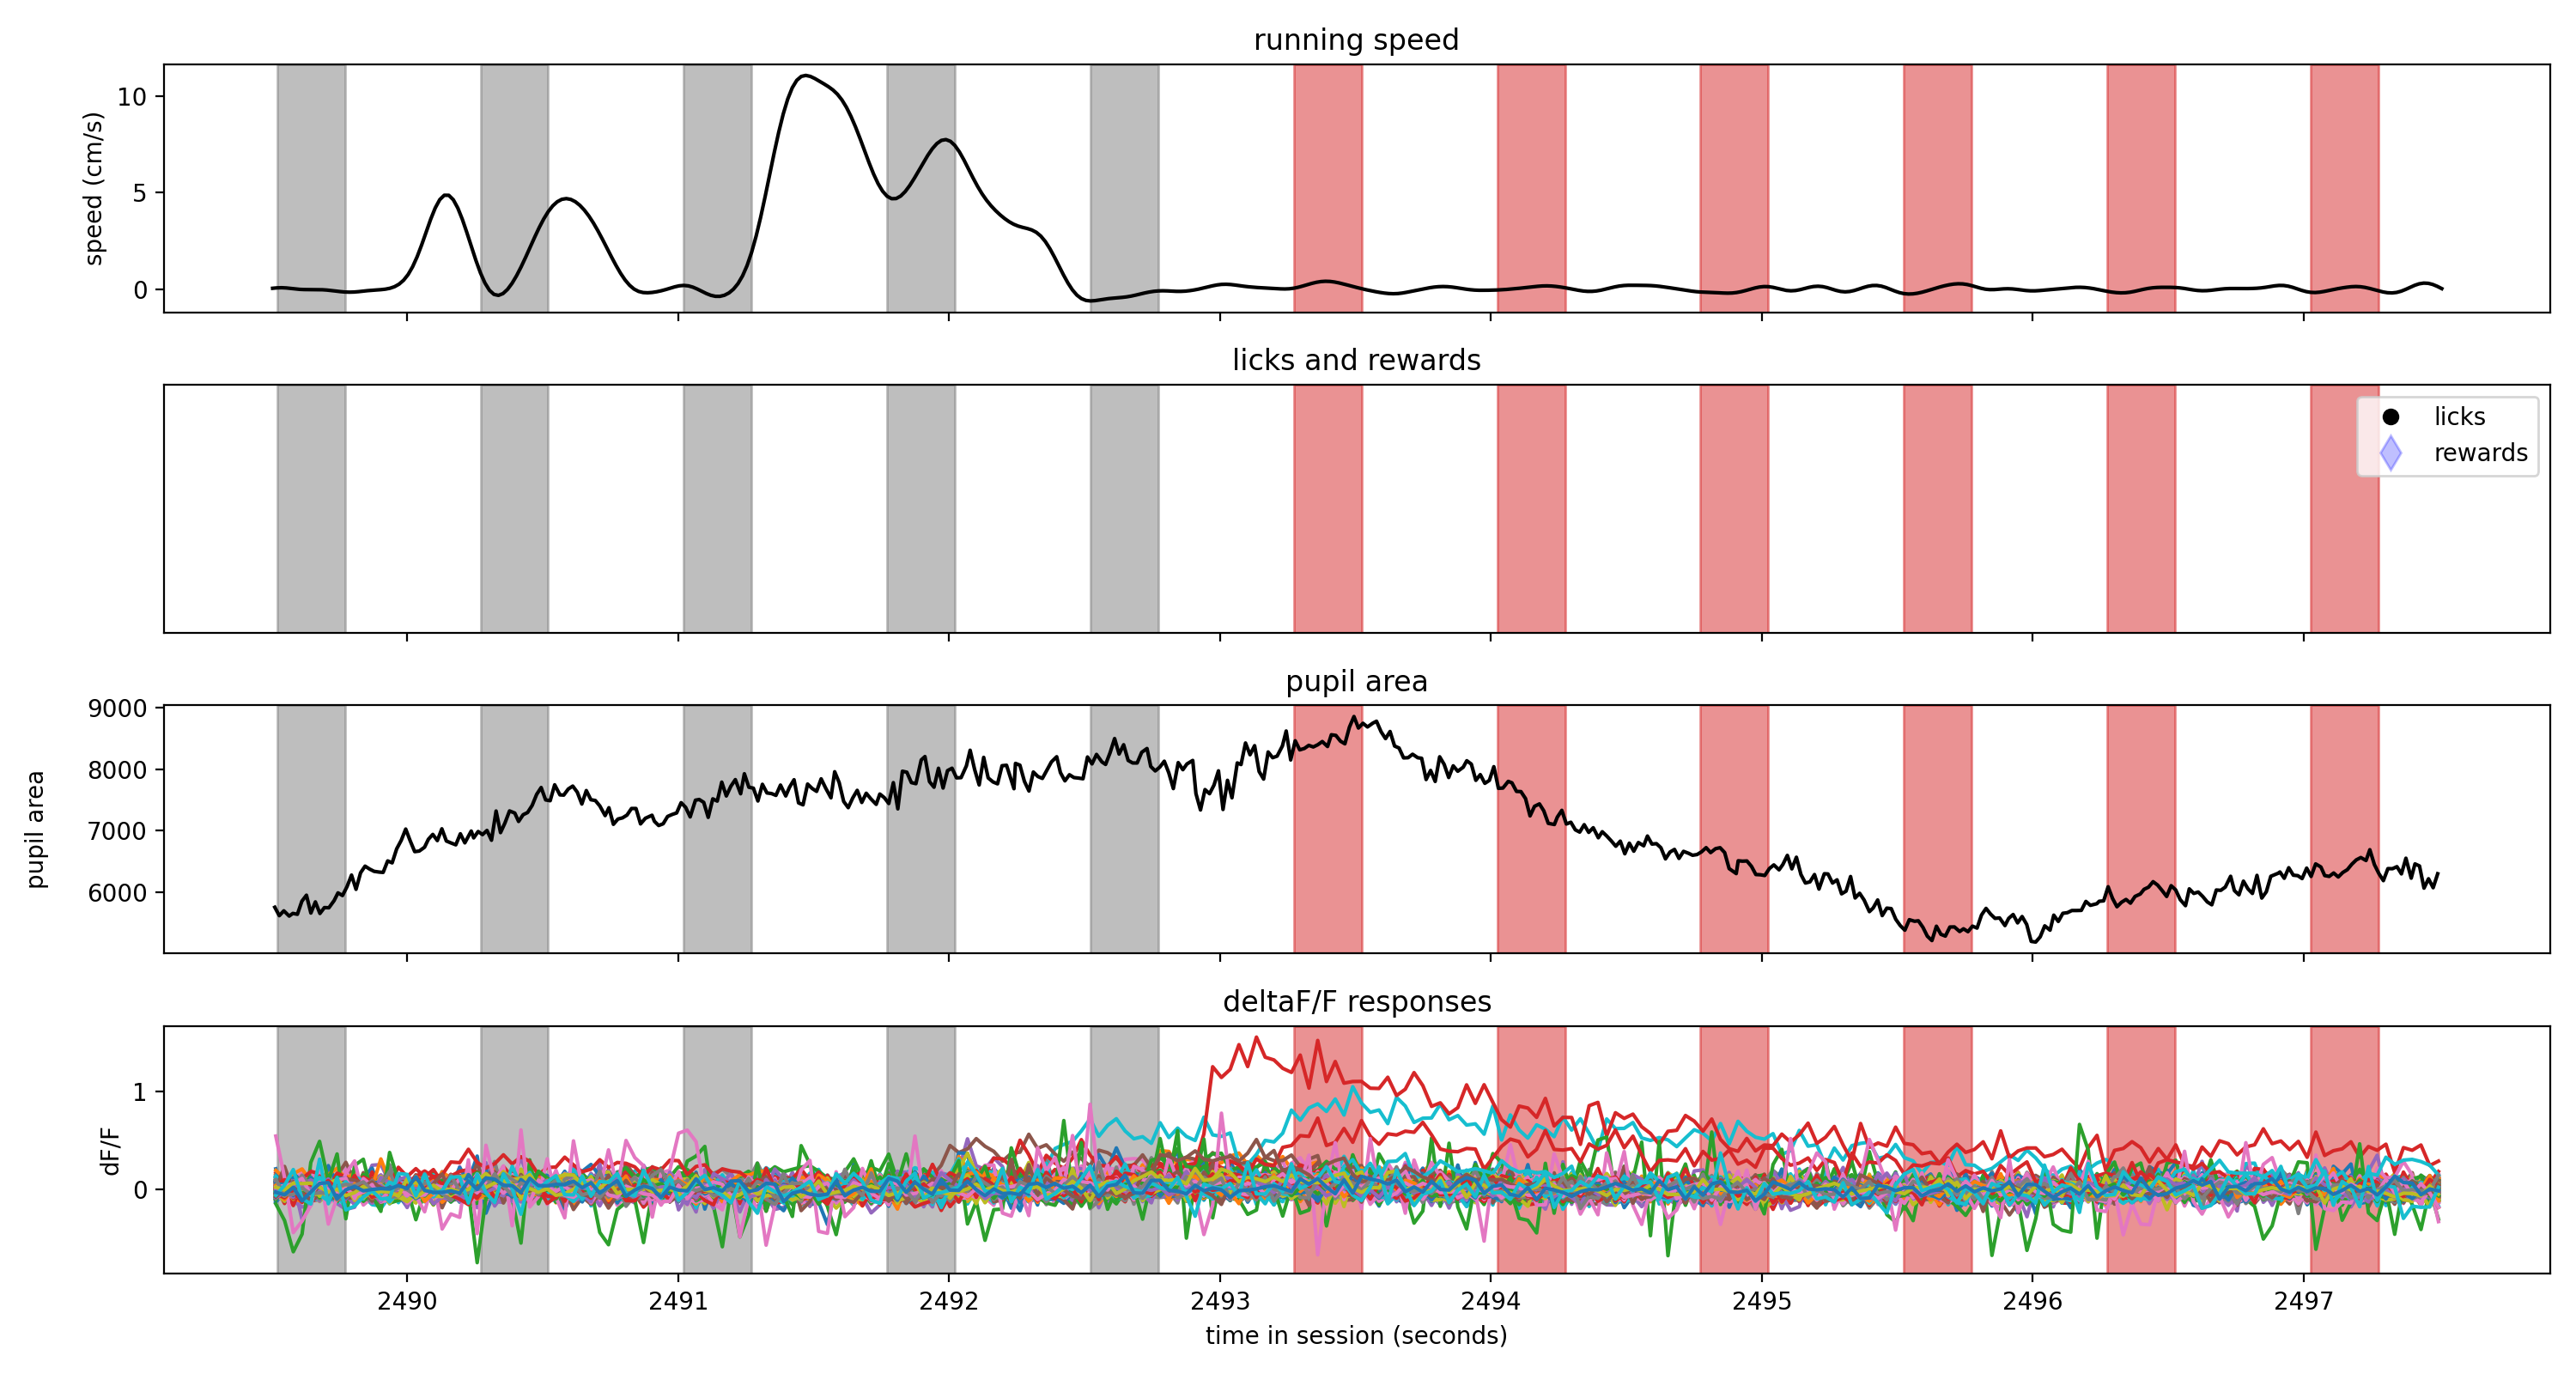

In [27]:
trial = experiment_dataset.trials.query('miss').sample(random_state = 2)
fig, axes = make_trial_plot(trial)

### here is a false alarm trial
Notes:
* The image identity was consistent during the entire trial
* The animal slowed and licked partway through the trial
* There were no rewards on this trial
* The pupil area shows some missing data - these were points that were filtered out as outliers.
* There were not any neurons with obvious stimulus locked responses

<IPython.core.display.Javascript object>


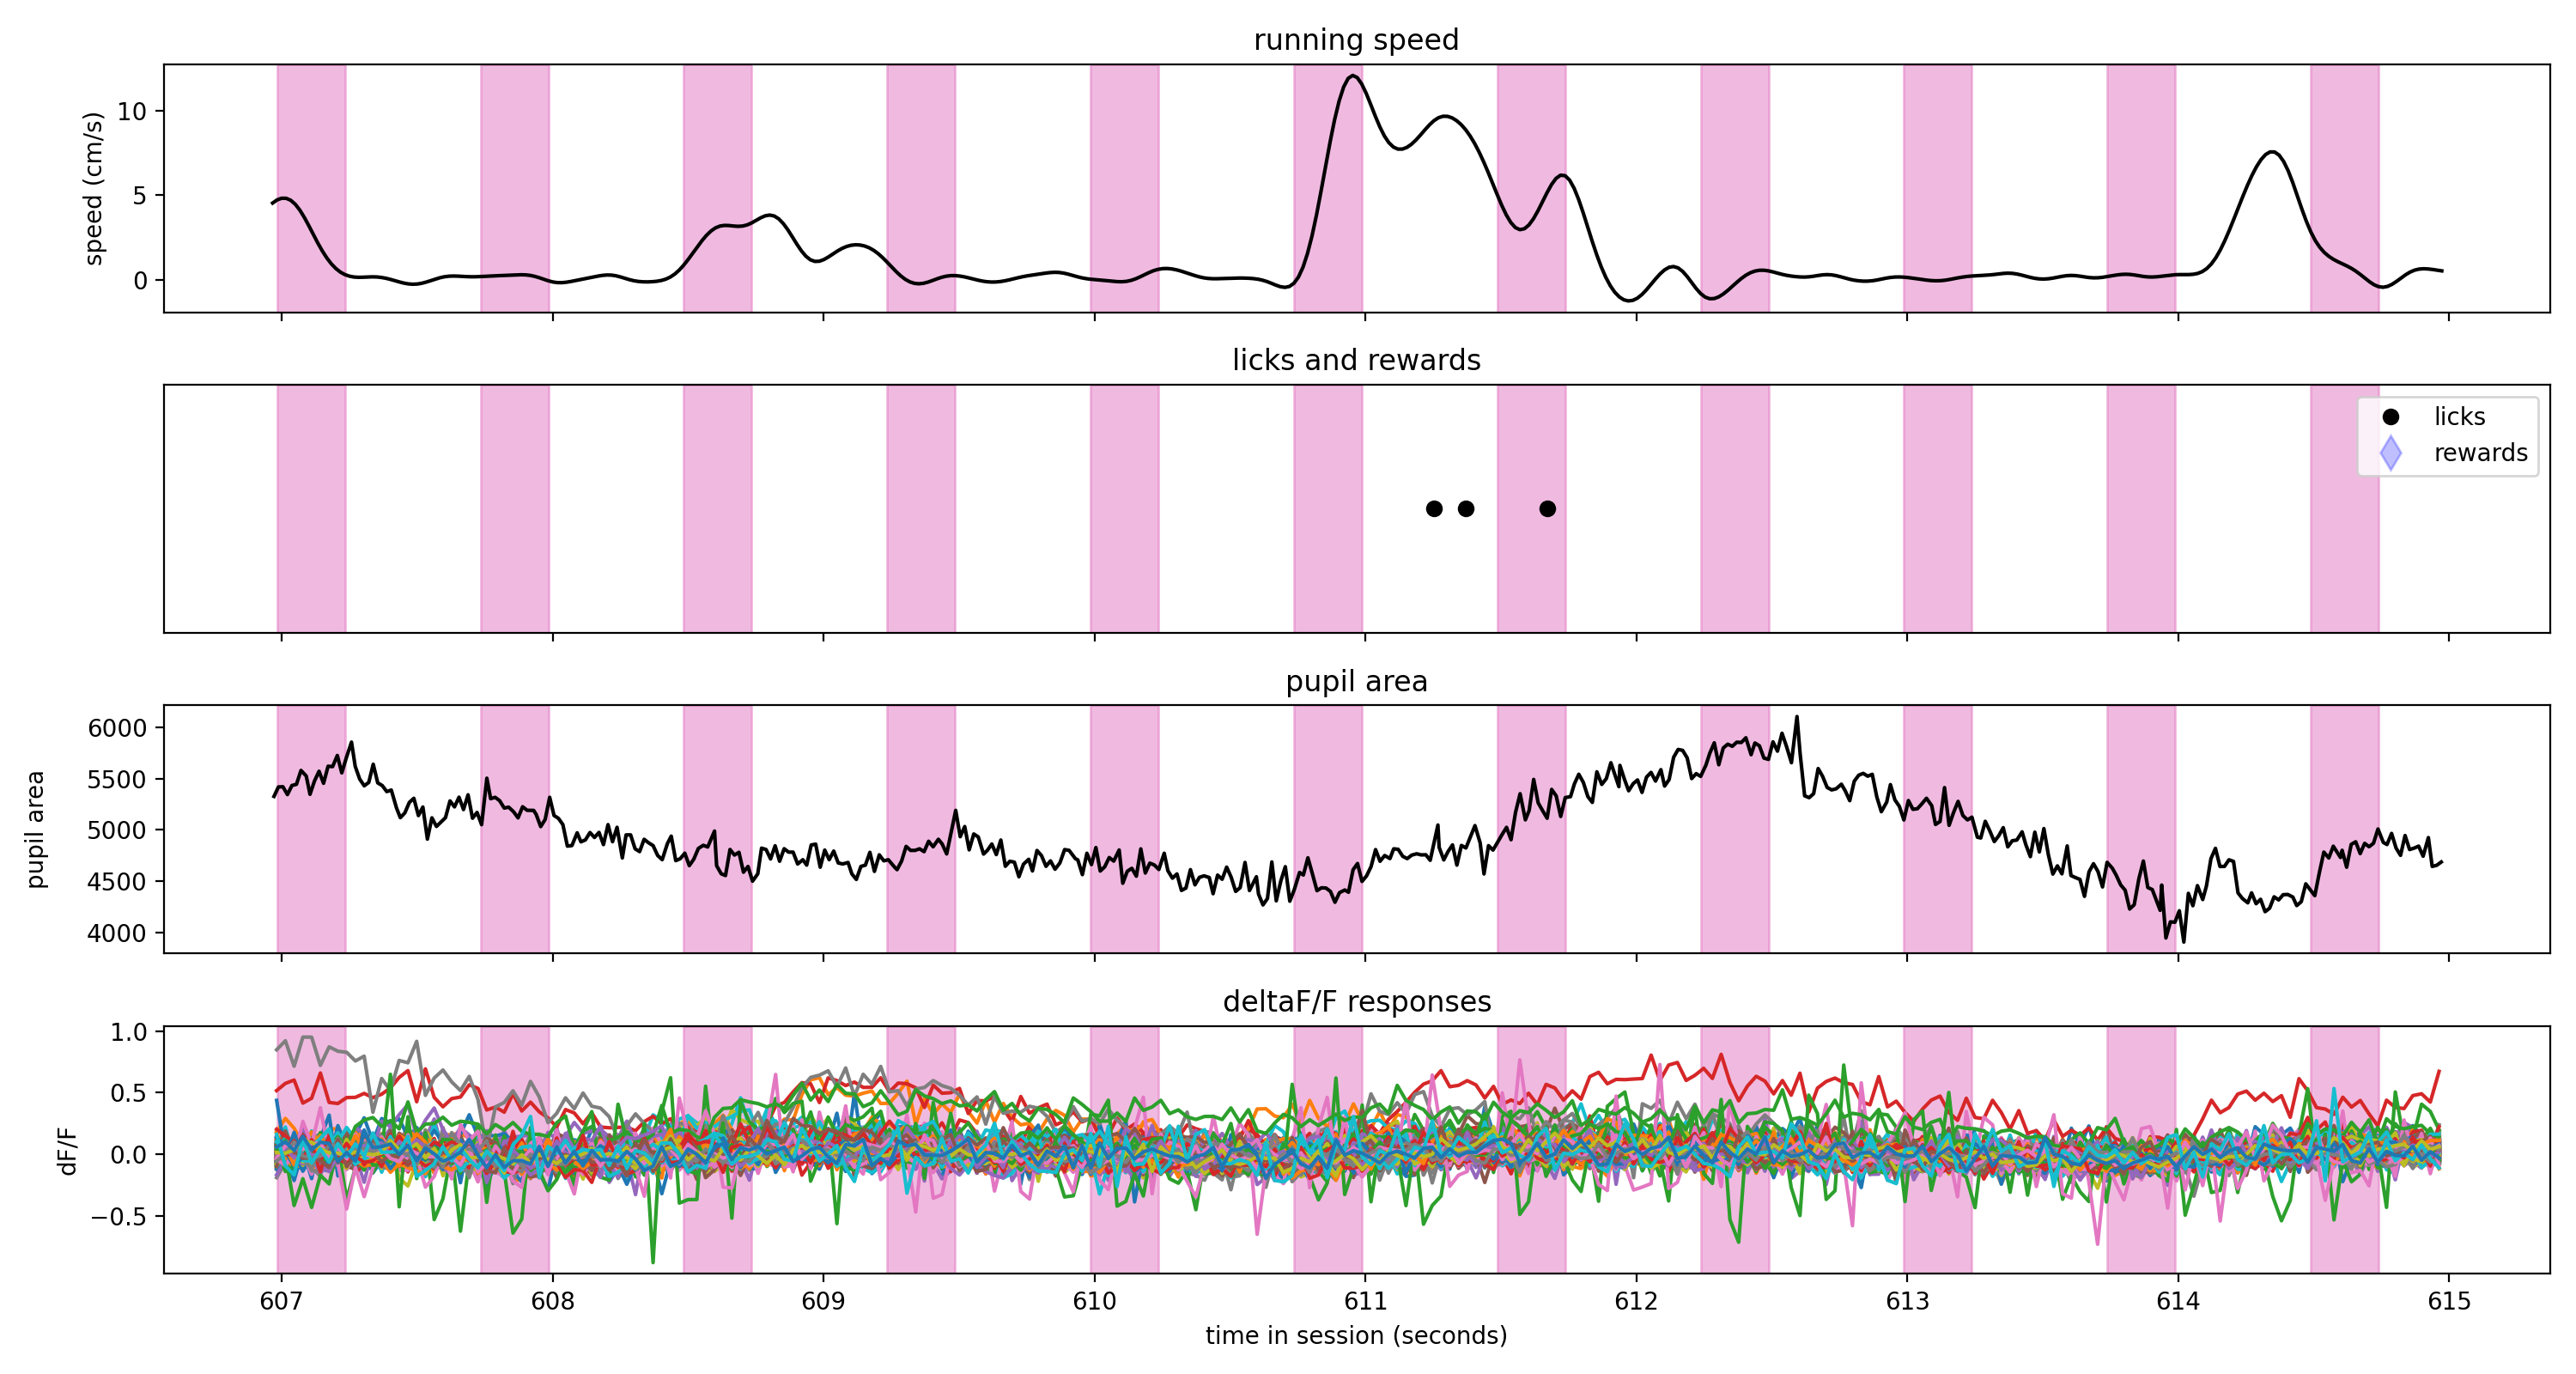

In [28]:
trial = experiment_dataset.trials.query('false_alarm').sample(random_state = 2)
fig, axes = make_trial_plot(trial)

### And finally, a correct rejection
Notes:
* The image identity was consistent during the entire trial
* The animal did not slow or lick during this trial
* There were no rewards on this trial

<IPython.core.display.Javascript object>


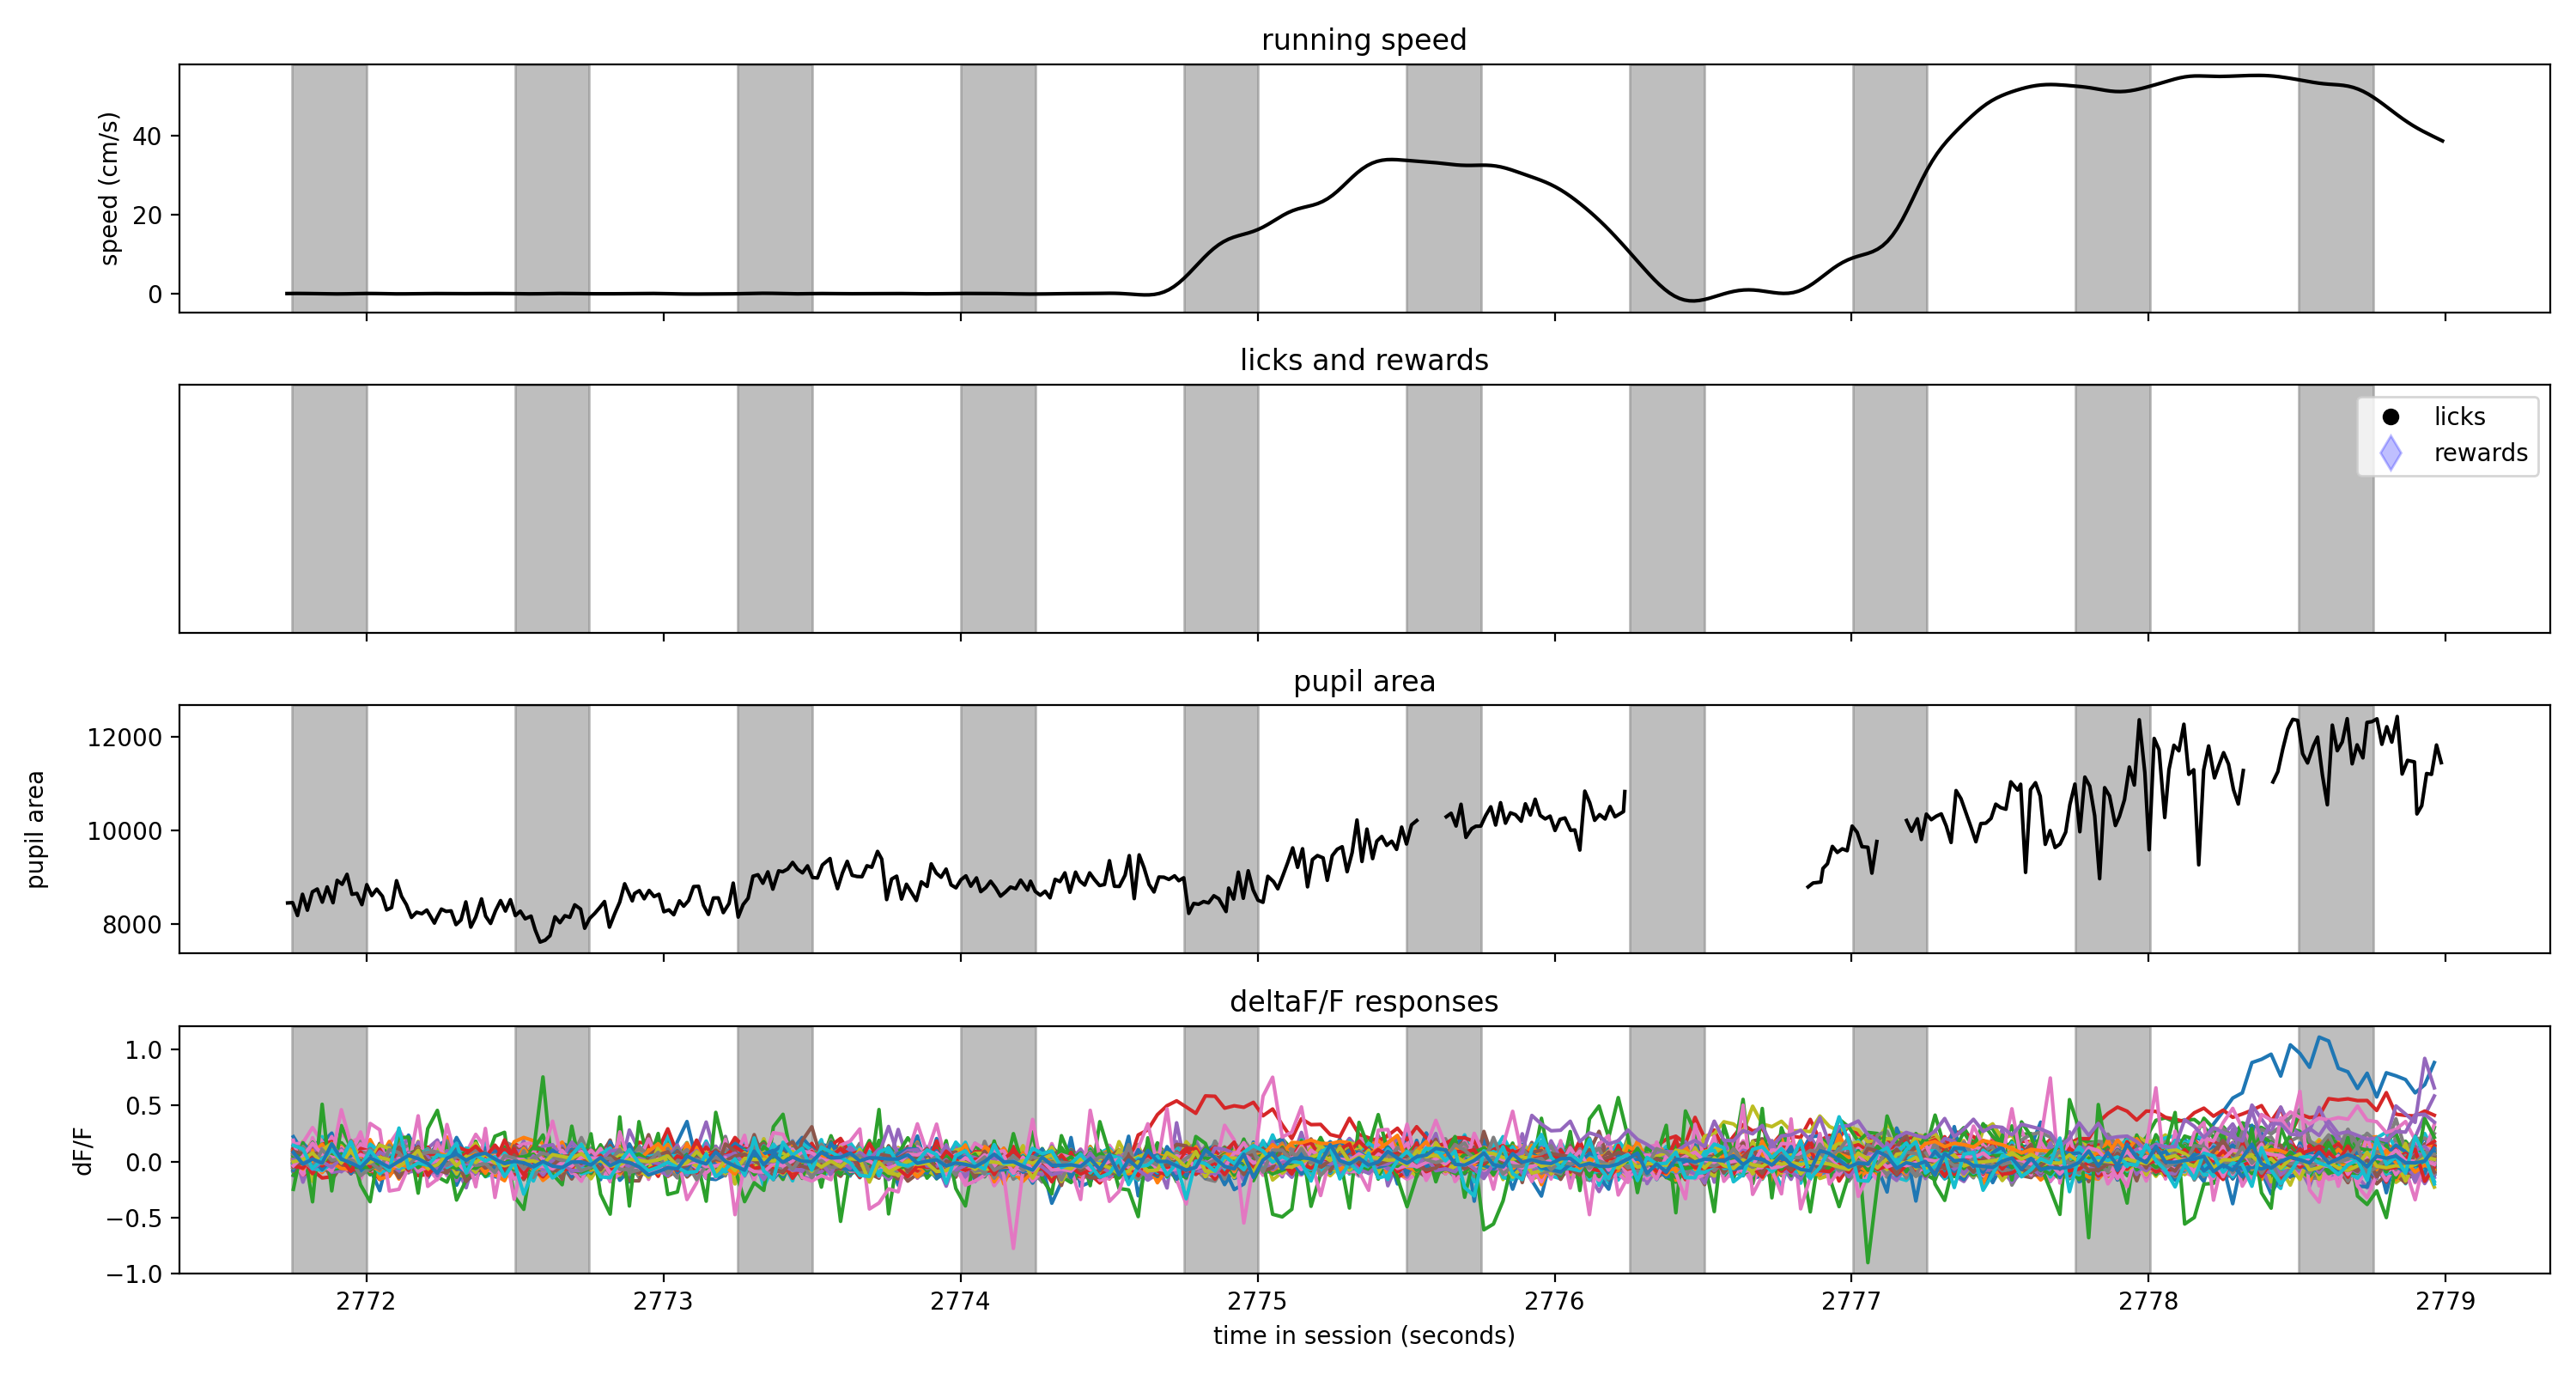

In [29]:
trial = experiment_dataset.trials.query('correct_reject').sample(random_state = 10)
fig, axes = make_trial_plot(trial)